Redes Complejas con aplicación a Biología de Sistemas - 2018

# Trabajo Computacional no. 01 de Redes Complejas
#### Grupo: Marco A. Villagran Azuara, Carlos Andres Rios Chavez, Andres Troiano y Rodrigo Sieira.

# Ejercicio no. 2

### Considere la red social de 62 delfines de Nueva Zelanda (dolphins.txt).

**a.** Examine diferentes opciones de layout para este grafo e identifique la que le resulte más informativa. Justifique su elección de tallando las características estructurales de la red que su elección pone en evidencia. Incluya en la representación gráfica de la red información sobre el sexo de los delfines.

In [3]:
# Modulos ########
import numpy as np
import math as ma
import networkx as nx
import powerlaw
from matplotlib import pyplot as plt

In [4]:
# Abre el archivo gml de la red social de delfines
dd = nx.read_gml('dolphins.gml')

# Abre el archivo con datos de genero de los delfines
archivo2=open('dolphinsGender.txt','r').readlines()

In [5]:
# Abrir variables e ingresar información de los nodos, incluyendo código de color
nombres = []
generos = []
gender_dict = {}
numeros = {}
colores = []
machos = 0
hembras = 0
incognita = 0

k = 0
for i in archivo2:
    j=i.split("\t")
    gender_dict[j[0]] = j[1].rstrip()
    if gender_dict[j[0]] == 'f':
      colores.append('orange')
      hembras = hembras + 1
    if gender_dict[j[0]] == 'm':
      colores.append('green')
      machos = machos + 1
    if gender_dict[j[0]] == 'NA':
      colores.append('black')
      incognita = incognita + 1
    numeros[j[0]] = k
    nombres.append(j[0])
    k = k+1

In [6]:
# Agrega atributos a los nodos de la red
nx.set_node_attributes(dd, gender_dict, 'gender')
nx.set_node_attributes(dd, numeros, 'id')

Después de ingresar los datos de nodos y enlaces se agregó la información correspondiente al genero de cada delfín. También se agregó el código de color de género correspondiente a <font color=orange> femenino </font>, <font color=green> masculino </font> y n.a., respectivamente. Con esto podemos representar la red de distintas formas, en particular utilizamos las funciones _kamada_ _kawai_, _spring_, _shell_ y _random_ del paquete **networkx**.

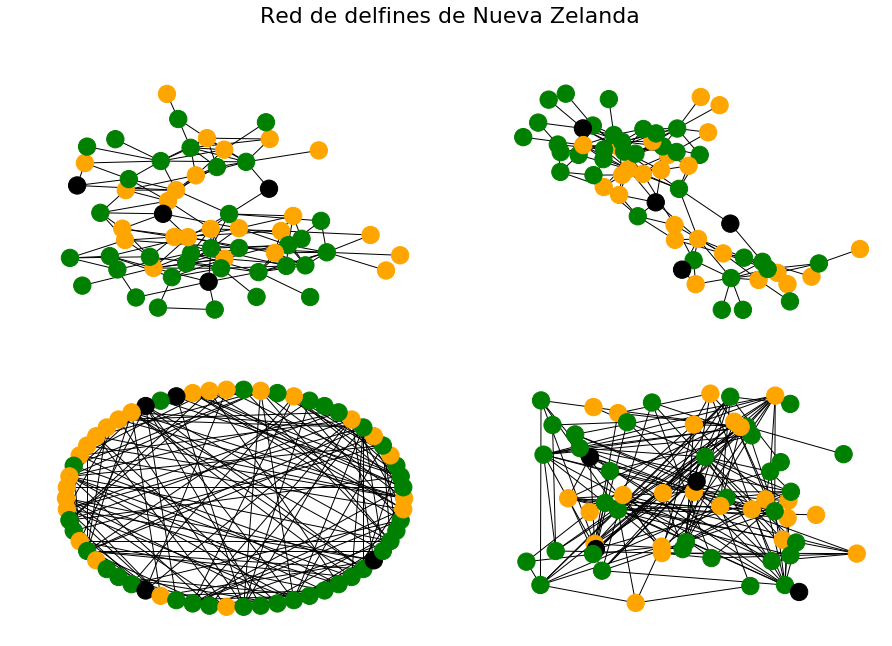

In [7]:
#Plotting
fig = plt.figure(figsize=(15,10))
plt.suptitle('Red de delfines de Nueva Zelanda', fontsize=22)
plt.subplot(2, 2, 1)
nx.draw_kamada_kawai(dd, node_color = colores)
plt.subplot(2, 2, 2)
nx.draw_spring(dd, node_color = colores)
plt.subplot(2, 2, 3)
nx.draw_shell(dd, node_color = colores)
plt.subplot(2, 2, 4)
nx.draw_random(dd, node_color = colores)
#plt.savefig('maps.png', dpi=300)
plt.show()

La red de la esquina **superior derecha** es la elaborada con la funcion _spring_, la cual consideramos nos da una buena representación para la red de delfines. Esta representación permite distinguir dentro de la red dos componentes principales conectados entre sí por medio de seis enlaces.

***b.*** Se trata una red donde prevalece la homofilia en la variable género? Para responder

i. Considere la distribución nula para la fracción de enlaces que vinculan géneros diferentes, generada a partir de  al menos 1000 asignaciones aleatorias de género. 

In [8]:
# Transformamos los datos gml en matriz de adyacencia e ingresamos información de homofilia de género a las celdas
sexo = nx.get_node_attributes(dd, 'gender')
ndd = nx.to_numpy_matrix(dd)
nexos = 0
for i in range(0,62):
    for j in range(0,62):
        if ndd[i,j] == 1:
            if sexo[nombres[i]] == sexo[nombres[j]]: 
                ndd[i,j] = ndd[i,j] * 2
                nexos = nexos + 1

In [9]:
# Abrimos variables e ingresamos género y grados de los nodos
grado = []
clase = []
for i in range(0,62):
    grado.append(dd.degree[nombres[i]])
    clase.append(sexo[nombres[i]])

In [10]:
# Determinar la sumatoria del producto ki.kj/2m cuando género i == género j
# El resultado final se divide por 2 debido a que los enlaces se cuentan dos veces (AB y BA)
num_m = 0.0
num_f = 0.0
num_na = 0.0

for i in range(0,np.size(grado)):
  for j in range(0,np.size(grado)):
    if i != j:
      if clase[i] == clase[j]:
        if clase[i] == 'm':
          num_m = num_m + ((grado[i] * grado[j])/(2*dd.number_of_edges() + 0.0))    
        if clase[i] == 'f':
          num_f = num_f + ((grado[i] * grado[j])/(2*dd.number_of_edges() + 0.0)) 
        if clase[i] == 'NA':
          num_na = num_na + ((grado[i] * grado[j])/(2*dd.number_of_edges() + 0.0)) 

num_m = num_m / 2
num_f = num_f / 2
num_na = num_na / 2

La modularidad nos ayuda a decidir si nuestra red es asortativa, siguiendo a _Newman (2010)_ en su ecuacion **(7.69)** tenemos:  

\begin{equation}
Q = \frac{1}{2}\sum_{ij} \left( A_{ij} - \frac{k_i k_j}{2m} \right) \delta(c_i,c_j)
\end{equation}

In [16]:
#Aqui se calcula la modularidad, con la Eq. 7.69 de Newman (2010)

Q = (nexos/2*dd.number_of_edges()) - ((num_m + num_f + num_na)/2*dd.number_of_edges())

print "La modularidad Q es:"
print Q

La modularidad Q es:
5650.25


In [18]:
Qmax = 1 - ((1.0/2*dd.number_of_edges())*(num_m + num_f + num_na))
print "El coeficiente de asortatividad:"
print Q/Qmax

El coeficiente de asortatividad:
-0.974727217838


Un coeficiente de asortatividad $Q/Q_{max} < 0$, habla de una red disortativa, confirmando lo que se puede ver en las gráficas de las redes presentadas en la figura anterior. 

Aqui comenzaremos a construir la hipotesis nula para los enlaces entre nodos de genero igual a partir de $1 \times 10^4$  repeticiones aleatorias utilizando la función _shuffle_ de el paquete **numpy**.

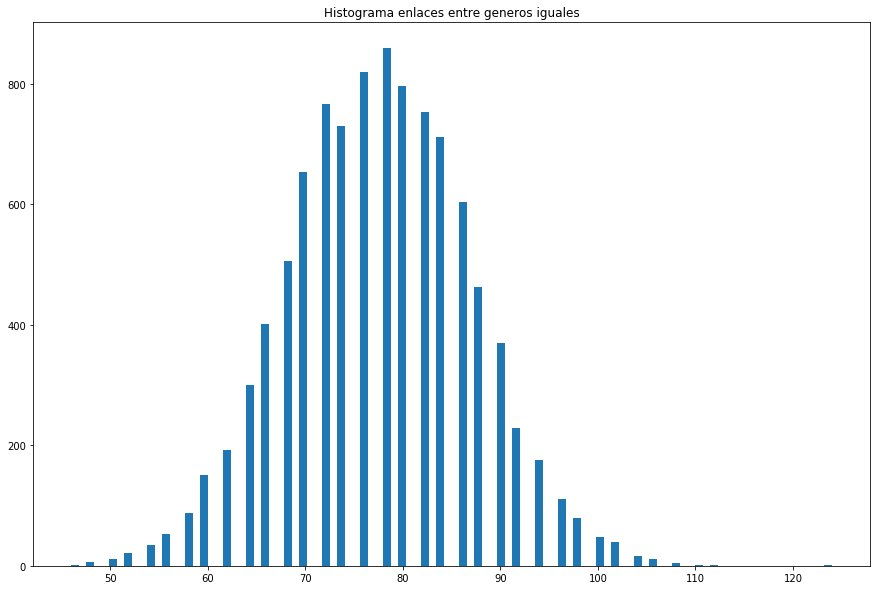

In [44]:
#La funcion de np.random.shuffle(arreglo) modifica el arreclo mezclando los valores que tiene. Esto no nos cambia el numero de edges ni la fraccion de nodos de cada genero

distro_generos = np.zeros(10000)

for k in range(0,10000):
  np.random.shuffle(clase)
  for i in range(0,62):
    for j in range(0,62):
      if ndd[i,j] == 1:
        if clase[i] == clase[j]: 
          distro_generos[k] = distro_generos[k] + 1

plt.close()
fig = plt.figure(figsize=(15,10))
plt.hist(distro_generos,bins=100)
plt.title('Histograma enlaces entre generos iguales')
#plt.savefig('histograma_null_delfines.png',dpi=300)
plt.show()

El histograma aparenta ser una campoana de Gauss, sin embargo, no es completamente simétrica. 

In [45]:
# Algunas cantidades utiles
media = np.mean(distro_generos)
des_std = np.std(distro_generos)

# Calculo del area del histograma
values, bines = np.histogram(distro_generos,bins=100)
area = sum(np.diff(bines)*values)

values_nexos = []
bines_nexos = []

for i in range(0,101):
  if bines[i] >= nexos/2:
    bines_nexos.append(bines[i])
    values_nexos.append(values[i-1])

values_nexos.remove(values_nexos[0])
new_area = sum(np.diff(bines_nexos)*values_nexos)

p_value = new_area/area

#Para el calculo del area despues de el numero de nexos original, da 0.1999 cuando se normaliza a 1
values_nexos = []
bines_nexos = []

for i in range(0,101):
  if bines[i] >= np.mean(distro_generos):
    bines_nexos.append(bines[i])
    values_nexos.append(values[i-1])

values_nexos.remove(values_nexos[0])
new_area = sum(np.diff(bines_nexos)*values_nexos)

p_value_mean = new_area/area

print "La media de la distribucion es:"
print media
print "La desviacion estandar de la distribucion es:"
print des_std
print "El valor p para el numero de conecciones entre nodos del mismo genero considerando la distribucion es:"
print p_value

La media de la distribucion es:
77.6288
La desviacion estandar de la distribucion es:
9.310542978795597
El valor p para el numero de conecciones entre nodos del mismo genero considerando la distribucion es:
0.6819000000000005


#### ii.
A partir de lo obtenido proponga una estimación para el valor y el error de dicha cantidad cuando no existe vínculo entre topolgía de la red medio y asignación de género. Compare su estimación con el valor medio esperado.

La distribución generada con las $1 \times 10^4$ repeticiones tiene una media $\mu \sim 77.4$, con una desviación estandar $s \sim 9.2$. Al comparar esto con el número de enlaces que existen en la muestra $n_e = 87$ podemos ver que dicho valor cae dentro de la primera sigma de la distribución.  

#### iii.
Estime la significancia estadística (p-valor) del valor observado en el caso de la red real.

A partir de realizar la integral sobre la función de distribución que obtenemos, tomando como límite inferior el $n_e = 87$ de la muestra. Esto nos da un p-valor de $\sim 0.7$

# Ejercicio no. 3

#### Considere  la  red _as-22july06.gml_ creada por Mark Newman que contiene la estructura de los sistemas autónomos de internet relevada a mediados de 2006.

**Para esta sección se utilizó el trabajo de Alstott et al. (2014), DOI: http://www.plosone.org/article/info%3Adoi%2F10.1371%2Fjournal.pone.0085777**

In [46]:
#Lectura de datos
data_internet = nx.read_gml('DATA/as-22july06.gml')
a = list(data_internet)

In [47]:
#Para obtener la distribucion de grados de los nodos
amount = nx.Graph.order(data_internet)

grado = np.zeros(amount)
    
for i in range(0,amount):
  grado[i] = data_internet.degree[a[i]]

#### a. 
Encuentre gráficamente la distribución de grado $P_k$ como función de $k$ explorando diferentes alternativas: un bineado lineal o logarítmico, utilizando escalas logarítmicas o lineales en uno o ambos ejes. Discuta que alternativa permite apreciar mejor el carácter libre de escala de dicha distribución.

In [48]:
#Generando histogramas en logaritmo y en lineal
datos_log, bines_log = np.histogram(grado,bins=np.logspace(np.log10(np.min(grado)),np.log10(np.max(grado)),15))
datos_lin, bines_lin = np.histogram(grado,bins=np.linspace(np.log10(np.min(grado)),np.log10(np.max(grado)),15))

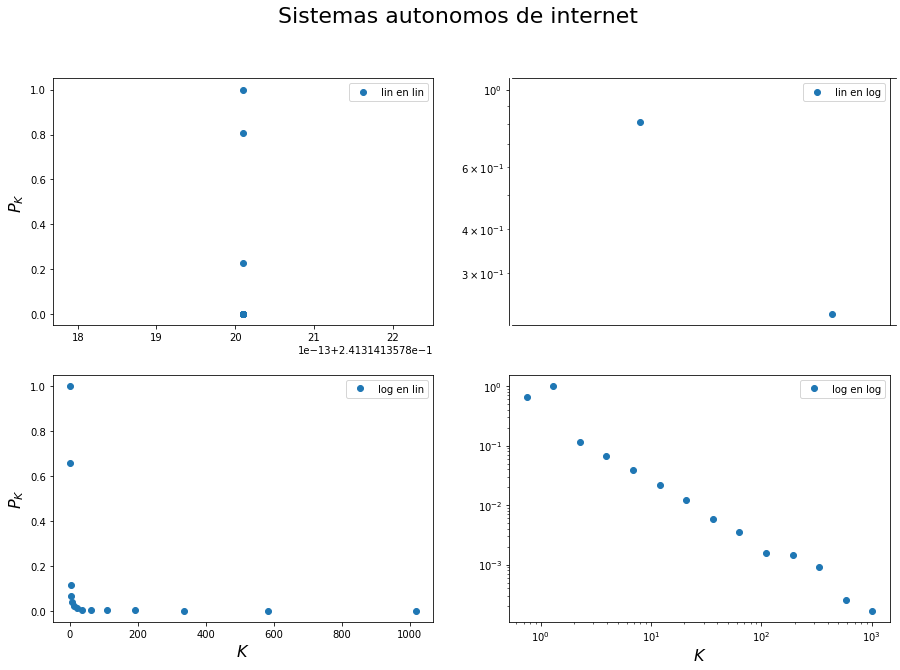

In [52]:
#Plotting

A = np.diff(bines_lin)
ydataA = np.divide(datos_lin + 0.0,np.amax(datos_lin))

B = np.diff(bines_log)
ydataB = np.divide(datos_log + 0.0,np.amax(datos_log))

fig = plt.figure(figsize=(15,10))
plt.suptitle('Sistemas autonomos de internet', fontsize=22)
plt.subplot(2, 2, 1)
plt.plot(A, ydataA,'o', label='lin en lin')
plt.ylabel(r'$P_K$', size=16)
plt.legend()
plt.subplot(2, 2, 2)
plt.loglog(A, ydataA,'o', label='lin en log')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(B, ydataB,'o', label='log en lin')
plt.xlabel(r'$K$', size=16)
plt.ylabel(r'$P_K$', size=16)
plt.legend()
plt.subplot(2, 2, 4)
plt.loglog(B, ydataB,'o', label='log en log')
plt.xlabel(r'$K$', size=16)
plt.legend()
#plt.savefig('maps.png', dpi=300)
plt.show()

En la figura anterior se puede observar cuatro distintas formas de representar los histogramas de distribución de grados de la red. La fila superior (inferior) es utilizando bines lineales (logaritmicos a base 10). La mejor representación para estos datos es el histograma generado con bines logaritmicos y representado en log vs. log.

#### b.
Utilizando funcionalidad de la librería igraph, estime el exponente de dicha distribución

Aquí se obtuvo el valor del exponente a la ley de potencias sin utilizar la librería _igraph_ y se hizo utilizando el trabajo de Alstott et al. (2014).

In [33]:
#Ajuste a ley de potencias, vease: https://github.com/jeffalstott/powerlaw
ajuste = powerlaw.Fit(grado,xmin=1.0)
print(ajuste.power_law.alpha)
print(ajuste.power_law.xmin)
R, p = ajuste.distribution_compare('power_law', 'lognormal')

#El alpha de la ley de potencias esta dado por ajuste.power_law.alpha

/home/marco/anaconda2/lib/python2.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


2.4351717529396106
1.0


/home/marco/anaconda2/lib/python2.7/site-packages/powerlaw.py:1605: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


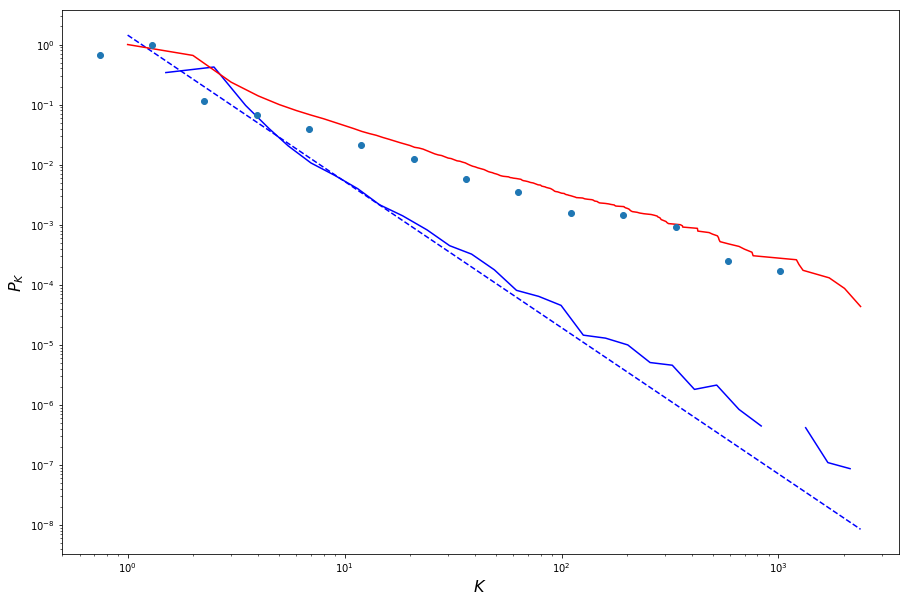

In [38]:
fig = plt.figure(figsize=(15,10))
powerlaw.plot_pdf(grado, color='b')
ajuste.power_law.plot_pdf(color='b', linestyle='--')
powerlaw.plot_ccdf(grado, color='r')
A = np.diff(bines_log)
ydata = np.divide(datos_log + 0.0,np.amax(datos_log))
plt.loglog(np.diff(bines_log),ydata,'o')
plt.xlabel(r'$K$', size=16)
plt.ylabel(r'$P_K$', size=16)
plt.show()

En la figura anterior se observa la representación de la distribución de probabilidad en logaritmo base 10 en color azul continuo, la distribucion cumulativa compuesta en color rojo, los puntos del histograma con bines logaritmicos y en linea azul discontinua se puede ver la ley de potencias ajustada. El exponente de la ley de potencias es $\gamma \sim - 2.4$

<!--bibtex

@ARTICLE{Alstott14,
   author = {{Alstott}, J. and {Bullmore}, E. and {Plenz}, D.},
    title = "{powerlaw: A Python Package for Analysis of Heavy-Tailed Distributions}",
  journal = {PLoS ONE},
archivePrefix = "arXiv",
   eprint = {1305.0215},
 primaryClass = "physics.data-an",
     year = 2014,
    month = jan,
   volume = 9,
    pages = {e85777},
      doi = {10.1371/journal.pone.0085777},
   adsurl = {http://adsabs.harvard.edu/abs/2014PLoSO...985777A},
  adsnote = {Provided by the SAO/NASA Astrophysics Data System}
}

@BOOK{Newmann10,
  author = {{Newmann}, M. E. J.},
   title = "{Networks an Introduction}",
    year = 2010,
}
-->

### Bibliography 
$\cdot$ J. Alstott et. al. (2014), _powerlaw: A Python Package for Analysis of Heavy-Tailed Distributions_, PLoS ONE, p. e85777
# 
$\cdot$ M. E. J. Newmann (2010), _Networks an Introduction_